In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [2]:
fraud=pd.read_csv('Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [4]:
fraud['Taxable.Income'] = np.where( fraud['Taxable.Income'] <= 30000, 1, 0)

In [5]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [6]:
fraud['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [9]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [10]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,0,39492,7,1,0,0,1
596,0,55369,2,1,0,0,1
597,0,154058,0,0,0,0,1
598,0,180083,17,1,1,0,0


C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


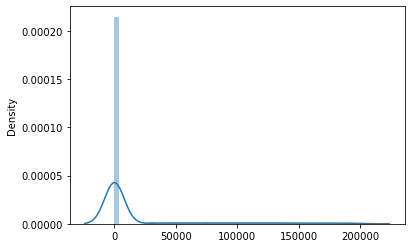

In [32]:
sns.distplot(fraud)
plt.show()

# Normalization

In [25]:
def norm_fucn(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [26]:
fraud2=norm_fucn(fraud)

In [27]:
fraud2

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.0,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.0,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.0,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
595,0.0,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,1.0,1.0,0.0,0.0


In [35]:
x=fraud2.iloc[:,1:]
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [37]:
y=fraud2.iloc[:,0]
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income, Length: 600, dtype: float64

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)

# Building Decision Tree Classification Model

In [99]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)   

In [100]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

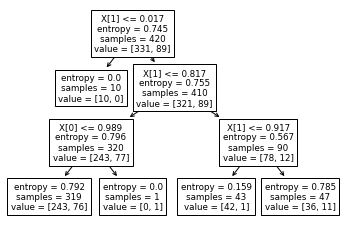

In [101]:
tree.plot_tree(model);

# Prediction

In [102]:
predict=model.predict(x_test)

In [103]:
pd.crosstab(y_test,predict)

col_0,0.0,1.0
Taxable.Income,,
0.0,144,1
1.0,34,1


# Accuracy check

In [104]:
np.mean(y_test==predict)

0.8055555555555556